This is a file for debugging and experimenting with `token_scoring.py` and `test_token_scoring.py`

# Import Libraries & Dataset

In [1]:
from transformers import AutoTokenizer
from datasets import load_dataset
import pandas as pd
from tqdm import tqdm

from token_scoring import *
from test_token_scoring import *

# Use sample from FLORES+ dataset 
flores_sample = load_dataset("openlanguagedata/flores_plus", split='dev').to_pandas()#.sample(100)

Resolving data files:   0%|          | 0/218 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/213 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/218 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/213 [00:00<?, ?it/s]

In [2]:
relevant_columns = ['language', 'text']
flores_sample = flores_sample.rename(columns={'iso_15924':'language'})[relevant_columns].reset_index()
print(flores_sample.shape)
flores_sample.head(2)

(217346, 3)


,index,language,text
0,0,Arab,يق أورو سنين، اوق علمون دري فکولتس کدوکترن يون...
1,1,Arab,ڤنليتي اوتام خن اترا ڽو موڠکين محسى ديتيکسي فو...


# Try Functions from `token_scoring.py`

In [3]:
text = flores_sample['text'][0]

fertility_score, tokens = fertility(text)
print('Fertility Score:', fertility_score)
print('Tokens:', tokens)

Fertility Score: 3.6666666666666665
Tokens: ['ÙĬÙĤ', 'ĠØ£', 'ÙĪØ±', 'ÙĪ', 'ĠØ³ÙĨ', 'ÙĬÙĨ', 'ØĮ', 'ĠØ§ÙĪ', 'ÙĤ', 'ĠØ¹ÙĦÙħ', 'ÙĪÙĨ', 'ĠØ¯Ø±', 'ÙĬ', 'ĠÙģ', 'Ú©', 'ÙĪÙĦ', 'ØªØ³', 'ĠÚ©', 'Ø¯ÙĪ', 'Ú©ØªØ±', 'ÙĨ', 'ĠÙĬ', 'ÙĪÙĨÙĬ', 'Û', 'ı', 'Ø±Ø³', 'ÙĬØª', 'Ø³', 'ĠØ³Øª', 'Ø§ÙĨ', 'Ùģ', 'ÙĪØ±Ø¯', 'Ġ', 'Ý', '¢', 'Ú', '¤', 'Ø¹Ùħ', 'ÙĪÙħ', 'ĠØ§', 'Ú©ÙĨ', 'ĠØ¬', 'Øª', 'ÙĪÙħ', 'Ùī', 'ĠØ§ÙĦØª', 'ĠØ¯', 'ÙĬØ§', 'Ý', '¢', 'ÙĨ', 'ÙĪØ³Øª', 'ÙĬ', 'Ú©', 'ĠØ¨Ø§Ø±', 'ÙĪ', 'Ġ', 'Ú', '½', 'Ú', 'ł', 'ĠØ¬', 'ÙĪØª', 'Ġ', 'Ý', '¢', 'Ú', '¤', 'ÙĬÙĦ', 'ÙĬÙĩ', 'ĠØ§Øª', 'ÙĪ', 'ĠØ³', 'ÙĬÙĦ', 'ĠÙħÙĨ', 'ÙĪØ±', 'ÙĪØª', 'ĠØ¬ÙĨ', 'ÙĬÙĩ', 'Ø¬', 'ÙĬÙĩ', ':', 'ĠÚĨ', 'ÙĬ', 'Ú', '¤', 'ĠØ§', 'ÙĪØ¨', 'ÙĬØª', 'Ġ', 'Ú', '½', 'Ú', 'ł', 'ĠØ¬', 'ÙĪØª', 'Ġ', 'Ý', '¢', 'ÚĨ', 'ÙĬØª', 'ÙĤ', 'Ġ', 'Ú', '½', 'Ú', 'ł', 'ĠØ¬', 'ÙĪØª', 'Ġ', 'Ý', '¢', 'Ú', '¤', 'Ý', '¢', 'Øª', 'ĠØ¯', 'Ú', 'ł', 'ÙĪÙĨ', 'Ġ', 'Ú', '¤', 'Ø±', 'ÙĬÙĨ', 'ØªØ±', 'ĠØ§ÙĬ', 'Ú', 'ł', 'âĢĮÚ©', 'Ø¬', 'ÙĬØª', 'ĠØ³Øª', 'ÙĨØ¯Ø±', 'ĠØ¯', 'Ú', 'ł', 'ÙĪÙĨ', 'ĠÙĬÙĪÙħ', 'ĠÙħÙĪ', 'Ú', '

In [4]:
text = flores_sample['text'][0]
tokenizer = AutoTokenizer.from_pretrained('microsoft/Phi-3.5-mini-instruct')

fertility_score, tokens = fertility(text, tokenizer)
print('Fertility Score:', fertility_score)
print('Tokens:', tokens)

Fertility Score: 5.977777777777778
Tokens: ['▁', 'ي', 'ق', '▁', 'أ', 'و', 'ر', 'و', '▁', 'س', 'ن', 'ي', 'ن', '،', '▁', 'ا', 'و', 'ق', '▁', 'ع', 'ل', 'م', 'و', 'ن', '▁', 'د', 'ر', 'ي', '▁', 'ف', 'ک', 'و', 'ل', 'ت', 'س', '▁', 'ک', 'د', 'و', 'ک', 'ت', 'ر', 'ن', '▁', 'ي', 'و', 'ن', 'ي', '<0xDB>', '<0x8F>', 'ر', 'س', 'ي', 'ت', 'س', '▁', 'س', 'ت', 'ا', 'ن', 'ف', 'و', 'ر', 'د', '▁', '<0xDD>', '<0xA2>', '<0xDA>', '<0xA4>', 'ع', 'م', 'و', 'م', '▁', 'ا', 'ک', 'ن', '▁', 'ج', 'ت', 'و', 'م', 'ى', '▁ال', 'ت', '▁', 'د', 'ي', 'ا', '<0xDD>', '<0xA2>', 'ن', 'و', 'س', 'ت', 'ي', 'ک', '▁', 'ب', 'ا', 'ر', 'و', '▁', '<0xDA>', '<0xBD>', '<0xDA>', '<0xA0>', '▁', 'ج', 'و', 'ت', '▁', '<0xDD>', '<0xA2>', '<0xDA>', '<0xA4>', 'ي', 'ل', 'ي', 'ه', '▁', 'ا', 'ت', 'و', '▁', 'س', 'ي', 'ل', '▁', 'م', 'ن', 'و', 'ر', 'و', 'ت', '▁', 'ج', 'ن', 'ي', 'ه', 'ج', 'ي', 'ه', ':', '▁', 'چ', 'ي', '<0xDA>', '<0xA4>', '▁', 'ا', 'و', 'ب', 'ي', 'ت', '▁', '<0xDA>', '<0xBD>', '<0xDA>', '<0xA0>', '▁', 'ج', 'و', 'ت', '▁', '<0xDD>', '<0xA2>',

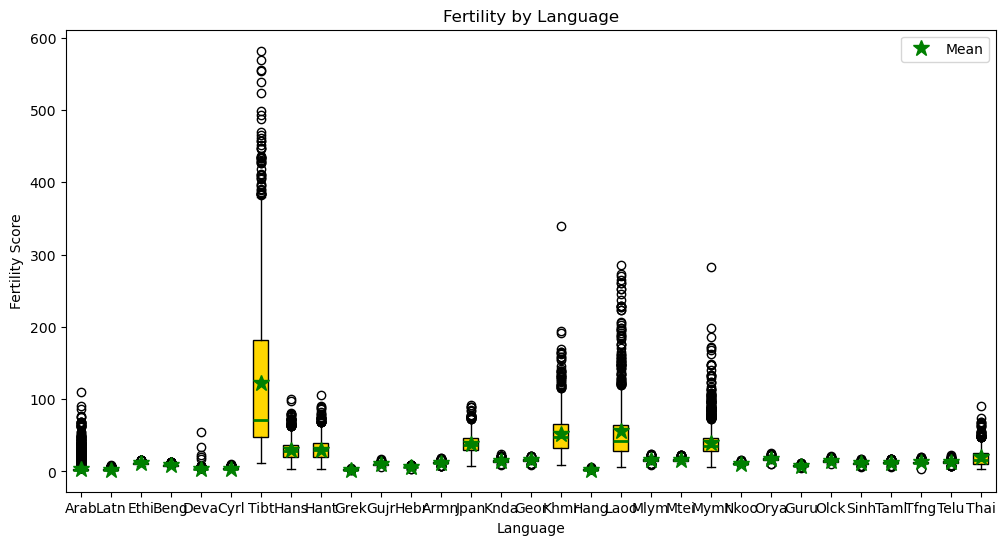

In [5]:
scored = get_fertilities(flores_sample, visualize=True)

In [6]:
scored

,index,language,text,fertility,tokens
0,0,Arab,يق أورو سنين، اوق علمون دري فکولتس کدوکترن يون...,3.666667,"[ÙĬÙĤ, ĠØ£, ÙĪØ±, ÙĪ, ĠØ³ÙĨ, ÙĬÙĨ, ØĮ, ĠØ§ÙĪ, ..."
1,1,Arab,ڤنليتي اوتام خن اترا ڽو موڠکين محسى ديتيکسي فو...,3.615385,"[Ú, ¤, ÙĨ, ÙĦÙĬ, ØªÙĬ, ĠØ§ÙĪØª, Ø§Ùħ, ĠØ®, ÙĨ,..."
2,2,Arab,جاس ۳۹سي ݢريڤين مڤوق لندسن ڤاچو ليڠک ڤوه ۹:۳۰ ...,3.954545,"[Ø¬, Ø§Ø³, Ġ, Û³, Û¹, Ø³ÙĬ, Ġ, Ý, ¢, Ø±ÙĬ, Ú, ..."
3,3,Arab,ڤيلوت ݢکالون ايدنتيتس سباݢو کڤالا سکوادرون ديل...,5.375000,"[Ú, ¤, ÙĬÙĦ, ÙĪØª, Ġ, Ý, ¢, Ú©, Ø§ÙĦ, ÙĪÙĨ, ĠØ..."
4,4,Arab,مديا دي سينن ݢڤتهى سابوه کندراءن ڤمادم اڤوي بن...,3.583333,"[Ùħ, Ø¯ÙĬ, Ø§, ĠØ¯ÙĬ, ĠØ³, ÙĬÙĨ, ÙĨ, Ġ, Ý, ¢, ..."
...,...,...,...,...,...
217341,217341,Latn,Inkathi yezivakashi ezindaweni zamagquma iyeny...,3.875000,"[In, k, athi, Ġy, ez, iv, ak, ashi, Ġez, ind, ..."
217342,217342,Latn,"Nokho, zinenhlobo ehlukile yobuhle nokukhanga ...",4.100000,"[N, ok, ho, ,, Ġz, inen, h, lo, bo, Ġe, hl, uk..."
217343,217343,Latn,Izinkampani zezindiza ezimbalwa kuphela ezinik...,3.875000,"[I, z, ink, am, pan, i, Ġz, ez, ind, iza, Ġez,..."
217344,217344,Latn,Izinkampani zezindiza ezinikeza lokhu zihlanga...,3.222222,"[I, z, ink, am, pan, i, Ġz, ez, ind, iza, Ġez,..."
